# IN-STK 5000: Reproducibility assignment

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import datasets
from sklearn import svm

In [3]:
#uploading the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [4]:
df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


The column names are missing in the dataframe. The column names are following:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names= ["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"])

In [6]:
df.head(100)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [7]:
#to display stats about the data

df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#to basic info about the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Preprocessing the dataset

In [10]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

## Exploratory Data Analysis

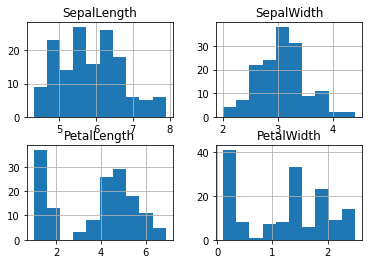

In [11]:
df.hist()
plt.savefig("hist.png")

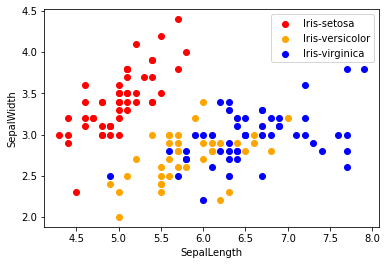

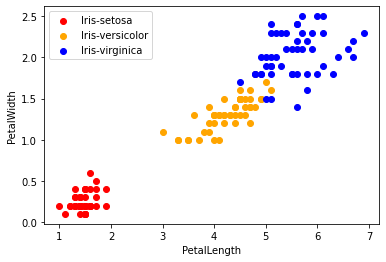

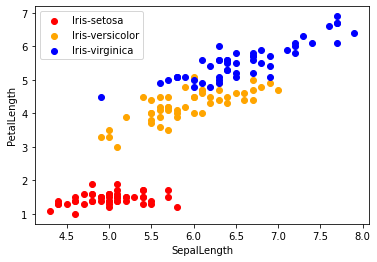

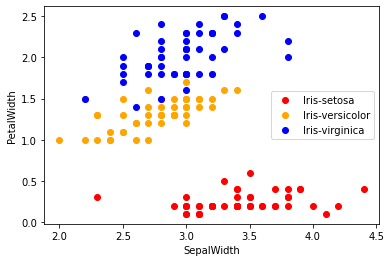

<Figure size 432x288 with 0 Axes>

In [12]:
#scatterplots

def plotting(sLength, sWidth):
    colors = ['red','orange','blue']
    species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

    for i in range(3):
        x = df[df['Species'] == species[i]]
        plt.scatter(x[sLength],x[sWidth],c=colors[i],label=species[i])

    plt.xlabel(sLength)
    plt.ylabel(sWidth)
    plt.savefig(sLength+sWidth+".png")

    plt.legend()
    plt.figure()

    
plotting("SepalLength","SepalWidth")
plotting("PetalLength","PetalWidth")
plotting("SepalLength","PetalLength")
plotting("SepalWidth","PetalWidth")

## Coorelation matrix

We can use the coorelation matrix to neglect the variables with high correlation. Each cell in the table shows the correlation between two variables. The value of target is in the range of -1 to 1. 

In [13]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


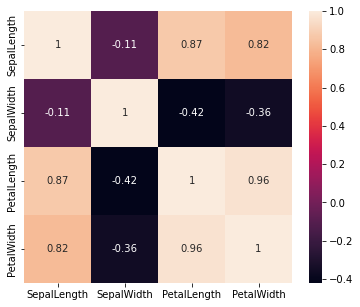

In [14]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(6,5))
sn.heatmap(corr,annot=True,ax=ax,)
plt.savefig("heatmap.png")

We can see both from the matrix and the heatmap that the value of the correlation between the variables are not very extreme, and therefore we do not need to neglect any of them.

## Label encoder

In [15]:
#converting the class from the label name to 0,1,2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Spliting the data

In [16]:
from sklearn.model_selection import train_test_split

#Spliting the data into: training- 75% and testing- 25%

X=df.drop(columns=['Species'])
Y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

## kNN classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
k = 10

modelkNN = KNeighborsClassifier(k)
modelkNN.fit(x_train,y_train)
accuracy = modelkNN.score(x_test,y_test)

print(f"k = {k}, accuracy = {accuracy}")

k = 10, accuracy = 0.9210526315789473


## Cross validation for finding optimal *k*

How do we know the best way for splitting the data? One could argue for splitting the data in 70% training and 30% testing, but there is no general explanation for this to be working well or for it to be an optimal solution. Therefore, we use the cross validation method to split the data and find the best perfomance of the model.

In [19]:
from sklearn.model_selection import cross_val_score

k_scores = []
for k in range(1,41):
    model = KNeighborsClassifier(k)
    scores = cross_val_score(model, X,Y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

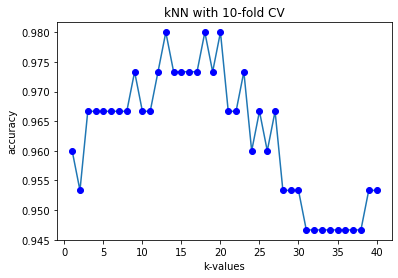

In [20]:
plt.plot(range(1,41),k_scores,'-')
plt.plot(range(1,41),k_scores,'bo')
plt.xlabel("k-values")
plt.ylabel("accuracy")
plt.title("kNN with 10-fold CV")
plt.savefig("accuracy_kNN.png")
plt.show()

In [21]:
max(k_scores)

0.9800000000000001

In [23]:
best_k = k_scores.index(max(k_scores))
print(f'best k = {best_k}, accuracy = {k_scores[best_k]}')

best k = 12, accuracy = 0.9800000000000001
